In [16]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 

In [3]:
dataset=pd.read_csv("nba_Player data.csv")
dataset

,Player,Position,Age,Games,Minutes Played,True Shooting(%),Threepoint Attempt rate,Free throw attempt rate,Player Efficiency Rating
0,Precious Achiuwa,PF,21,28,408.0,0.599,0.000,0.541,15.1
1,Jaylen Adams,PG,24,6,17.0,0.125,0.250,0.000,-6.9
2,Steven Adams,C,27,27,760.0,0.592,NaN,0.397,15.9
3,Bam Adebayo,C,23,26,873.0,0.641,0.015,0.469,22.7
4,LaMarcus Aldridge,C,35,18,480.0,0.542,0.298,0.093,15.2
...,...,...,...,...,...,...,...,...,...
492,Delon Wright,SG,28,28,823.0,0.559,0.298,0.346,16.6
493,Thaddeus Young,PF,32,23,592.0,0.597,0.104,0.169,18.5
494,Trae Young,PG,22,26,901.0,0.598,0.349,0.577,22.9
495,Cody Zeller,C,28,15,361.0,0.569,0.133,0.242,18.2


In [5]:
x= dataset.iloc[:,:-1].values 
y= dataset.iloc[:,3].values  
x

array([['Precious Achiuwa', 'PF', 21, ..., 0.599, 0.0, 0.541],
       ['Jaylen Adams', 'PG', 24, ..., 0.125, 0.25, 0.0],
       ['Steven Adams', 'C', 27, ..., 0.592, nan, 0.397],
       ...,
       ['Trae Young', 'PG', 22, ..., 0.598, 0.349, 0.577],
       ['Cody Zeller', 'C', 28, ..., 0.569, 0.133, 0.242],
       ['Ivica Zubac', 'C', 23, ..., 0.722, 0.007, 0.5]], dtype=object)

In [6]:
y

array([28,  6, 27, 26, 18,  3, 23, 19, 28, 12, 16,  2, 24, 27,  1, 18, 27,
       25, 18, 11, 27, 22, 27, 12, 29, 25, 28, 25, 13, 20, 27, 30, 25,  8,
       27, 25, 27, 28, 24, 29,  3, 19, 23, 20, 26,  4, 29, 13, 26, 13, 27,
        8,  9, 29, 12,  6, 14, 17, 23, 28,  1, 10, 10,  8,  4, 27, 28, 29,
       24, 26, 26,  7, 26, 13, 24, 10, 25, 27, 18, 16,  6,  1, 25, 25, 13,
       25,  3, 23, 16, 10, 22, 26, 12,  2, 26, 20, 29, 19, 28, 23, 25, 15,
       25, 26, 15, 24, 16, 22, 29, 23, 19, 22, 25, 28, 19,  3, 28, 27, 27,
       24,  1, 24, 17, 17, 25,  6, 19, 29, 13, 12, 21, 23, 20, 11,  6,  6,
       27,  6,  7, 15,  2, 19, 13, 28,  4, 15, 26,  3,  8,  3, 23, 16, 22,
       21, 29, 26, 20,  8, 22, 22, 10, 29, 22, 19, 22, 25, 28, 29, 24, 24,
       18, 30, 17, 20, 10, 19,  2, 25,  7, 21, 27, 24,  8, 16, 10,  2, 29,
       19,  2, 30, 26, 16, 28, 18, 21,  7, 26, 13, 13, 20, 27, 14, 28,  6,
       29, 23, 29, 25, 23, 19, 25, 17, 29, 14, 28,  6, 18,  7, 29, 26, 25,
       28, 20, 17,  7, 26

In [7]:
dataset.isnull()

,Player,Position,Age,Games,Minutes Played,True Shooting(%),Threepoint Attempt rate,Free throw attempt rate,Player Efficiency Rating
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
492,False,False,False,False,False,False,False,False,False
493,False,False,False,False,False,False,False,False,False
494,False,False,False,False,False,False,False,False,False
495,False,False,False,False,False,False,False,False,False


In [9]:
dataset.isnull().sum()

Player                      0
Position                    0
Age                         0
Games                       0
Minutes Played              2
True Shooting(%)            3
Threepoint Attempt rate     2
Free throw attempt rate     2
Player Efficiency Rating    0
dtype: int64

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [20]:
dataset.fillna(dataset.mean(), inplace=True)

In [21]:
dataset

,Player,Position,Age,Games,Minutes Played,True Shooting(%),Threepoint Attempt rate,Free throw attempt rate,Player Efficiency Rating
0,Precious Achiuwa,PF,21,28,408.0,0.599,0.000000,0.541,15.1
1,Jaylen Adams,PG,24,6,17.0,0.125,0.250000,0.000,-6.9
2,Steven Adams,C,27,27,760.0,0.592,0.406362,0.397,15.9
3,Bam Adebayo,C,23,26,873.0,0.641,0.015000,0.469,22.7
4,LaMarcus Aldridge,C,35,18,480.0,0.542,0.298000,0.093,15.2
...,...,...,...,...,...,...,...,...,...
492,Delon Wright,SG,28,28,823.0,0.559,0.298000,0.346,16.6
493,Thaddeus Young,PF,32,23,592.0,0.597,0.104000,0.169,18.5
494,Trae Young,PG,22,26,901.0,0.598,0.349000,0.577,22.9
495,Cody Zeller,C,28,15,361.0,0.569,0.133000,0.242,18.2


In [22]:
dataset.isnull().sum()

Player                      0
Position                    0
Age                         0
Games                       0
Minutes Played              0
True Shooting(%)            0
Threepoint Attempt rate     0
Free throw attempt rate     0
Player Efficiency Rating    0
dtype: int64

In [23]:
dataset.head(10)

,Player,Position,Age,Games,Minutes Played,True Shooting(%),Threepoint Attempt rate,Free throw attempt rate,Player Efficiency Rating
0,Precious Achiuwa,PF,21,28,408.0,0.599,0.000000,0.541,15.1
1,Jaylen Adams,PG,24,6,17.0,0.125,0.250000,0.000,-6.9
2,Steven Adams,C,27,27,760.0,0.592,0.406362,0.397,15.9
3,Bam Adebayo,C,23,26,873.0,0.641,0.015000,0.469,22.7
4,LaMarcus Aldridge,C,35,18,480.0,0.542,0.298000,0.093,15.2
5,Ty-Shon Alexander,SG,22,3,8.0,0.000,0.333000,0.000,-11.9
6,Nickeil Alexander-Walker,SG,22,23,441.0,0.502,0.463000,0.170,12.0
7,Grayson Allen,SG,25,19,454.0,0.630,0.721000,0.264,14.0
8,Jarrett Allen,C,22,28,734.0,0.695,0.021000,0.695,22.5
9,Jarrett Allen,C,22,12,320.0,0.730,0.000000,0.938,21.3


In [24]:
print(dataset.shape)
print(dataset.info())

(497, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Player                    497 non-null    object 
 1   Position                  497 non-null    object 
 2   Age                       497 non-null    int64  
 3   Games                     497 non-null    int64  
 4   Minutes Played            497 non-null    float64
 5   True Shooting(%)          497 non-null    float64
 6   Threepoint Attempt rate   497 non-null    float64
 7   Free throw attempt rate   497 non-null    float64
 8   Player Efficiency Rating  497 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 35.1+ KB
None


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Games'}>,
        <AxesSubplot:title={'center':'Minutes Played'}>],
       [<AxesSubplot:title={'center':'True Shooting(%)'}>,
        <AxesSubplot:title={'center':'Threepoint Attempt rate'}>,
        <AxesSubplot:title={'center':'Free throw attempt rate'}>],
       [<AxesSubplot:title={'center':'Player Efficiency Rating'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

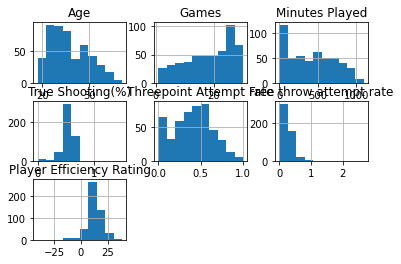

In [27]:
dataset.hist()

In [30]:
dataset.dtypes


Player                       object
Position                     object
Age                           int64
Games                         int64
Minutes Played              float64
True Shooting(%)            float64
Threepoint Attempt rate     float64
Free throw attempt rate     float64
Player Efficiency Rating    float64
dtype: object

<AxesSubplot:>

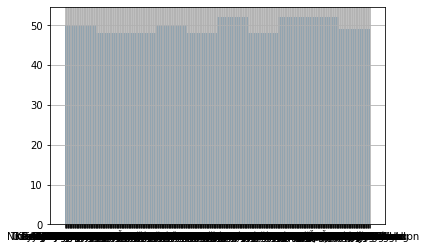

In [32]:
dataset["Player"].hist()

<AxesSubplot:>

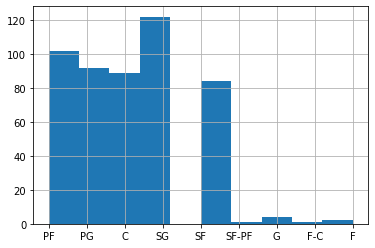

In [33]:
dataset["Position"].hist()

In [35]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                           6.000
Games                        14.000
Minutes Played              535.000
True Shooting(%)              0.107
Threepoint Attempt rate       0.308
Free throw attempt rate       0.176
Player Efficiency Rating      7.400
dtype: float64


In [36]:
print(dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))

       Age  Free throw attempt rate  Games  Minutes Played  Player  \
0    False                    False  False           False   False   
1    False                    False  False           False   False   
2    False                    False  False           False   False   
3    False                    False  False           False   False   
4    False                    False  False           False   False   
..     ...                      ...    ...             ...     ...   
492  False                    False  False           False   False   
493  False                    False  False           False   False   
494  False                    False  False           False   False   
495  False                    False  False           False   False   
496  False                    False  False           False   False   

     Player Efficiency Rating  Position  Threepoint Attempt rate  \
0                       False     False                    False   
1                      

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [37]:
print(dataset['Position'].quantile(0.10))
print(daataset['Position'].quantile(0.90))

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [45]:
X= dataset.iloc[:,:-1].values

In [46]:
x

array([['Precious Achiuwa', 'PF', 21, ..., 0.599, 0.0, 0.541],
       ['Jaylen Adams', 'PG', 24, ..., 0.125, 0.25, 0.0],
       ['Steven Adams', 'C', 27, ..., 0.592, nan, 0.397],
       ...,
       ['Trae Young', 'PG', 22, ..., 0.598, 0.349, 0.577],
       ['Cody Zeller', 'C', 28, ..., 0.569, 0.133, 0.242],
       ['Ivica Zubac', 'C', 23, ..., 0.722, 0.007, 0.5]], dtype=object)

In [47]:
y= dataset.iloc[:,3].values

In [48]:
y

array([28,  6, 27, 26, 18,  3, 23, 19, 28, 12, 16,  2, 24, 27,  1, 18, 27,
       25, 18, 11, 27, 22, 27, 12, 29, 25, 28, 25, 13, 20, 27, 30, 25,  8,
       27, 25, 27, 28, 24, 29,  3, 19, 23, 20, 26,  4, 29, 13, 26, 13, 27,
        8,  9, 29, 12,  6, 14, 17, 23, 28,  1, 10, 10,  8,  4, 27, 28, 29,
       24, 26, 26,  7, 26, 13, 24, 10, 25, 27, 18, 16,  6,  1, 25, 25, 13,
       25,  3, 23, 16, 10, 22, 26, 12,  2, 26, 20, 29, 19, 28, 23, 25, 15,
       25, 26, 15, 24, 16, 22, 29, 23, 19, 22, 25, 28, 19,  3, 28, 27, 27,
       24,  1, 24, 17, 17, 25,  6, 19, 29, 13, 12, 21, 23, 20, 11,  6,  6,
       27,  6,  7, 15,  2, 19, 13, 28,  4, 15, 26,  3,  8,  3, 23, 16, 22,
       21, 29, 26, 20,  8, 22, 22, 10, 29, 22, 19, 22, 25, 28, 29, 24, 24,
       18, 30, 17, 20, 10, 19,  2, 25,  7, 21, 27, 24,  8, 16, 10,  2, 29,
       19,  2, 30, 26, 16, 28, 18, 21,  7, 26, 13, 13, 20, 27, 14, 28,  6,
       29, 23, 29, 25, 23, 19, 25, 17, 29, 14, 28,  6, 18,  7, 29, 26, 25,
       28, 20, 17,  7, 26